In [1]:
%reload_ext jupyter-rdfify

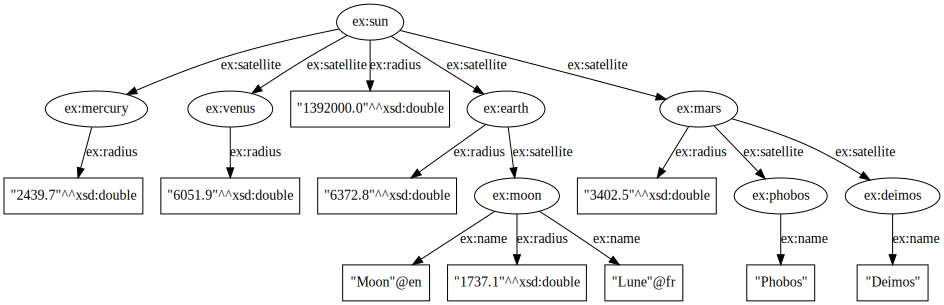

In [7]:
%%rdf turtle --label planets

@prefix ex: <http://example.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:sun ex:radius "1.392e6"^^xsd:double ;
ex:satellite ex:mercury , ex:venus , ex:earth , ex:mars .
ex:mercury ex:radius "2439.7"^^xsd:double .
ex:venus ex:radius "6051.9"^^xsd:double .
ex:earth ex:radius "6372.8"^^xsd:double ;
ex:satellite ex:moon .
ex:mars ex:radius "3402.5"^^xsd:double ;
ex:satellite ex:phobos, ex:deimos .
ex:moon ex:name "Lune"@fr, "Moon"@en ;
ex:radius "1737.1"^^xsd:double .
ex:phobos ex:name "Phobos" .
ex:deimos ex:name "Deimos" .

In [16]:
%%rdf sparql --local planets

# Question A
PREFIX ex: <http://example.org/>
SELECT ?object ?center
WHERE {
    { ?object ex:radius ?rad . }
    OPTIONAL { ?center ex:satellite ?object . }
    FILTER (?rad > 3000)
}

?object,?center
http://example.org/sun,None
http://example.org/venus,http://example.org/sun
http://example.org/earth,http://example.org/sun
http://example.org/mars,http://example.org/sun


In [18]:
%%rdf sparql --local planets

# Question C
PREFIX ex: <http://example.org/>
SELECT ?object
WHERE {
    ?object ex:satellite ?satellite .
    ?satellite ex:name ?name .
    ?center ex:satellite ?object .
    ?center ex:radius ?rad .
    FILTER (langMATCHES(LANG(?name), "en"))
    FILTER (?rad > 3000)
}

?object
http://example.org/earth


In [17]:
%%rdf sparql --local planets

# Question B
PREFIX ex: <http://example.org/>
SELECT ?object
WHERE {
    ?object ex:satellite ?satellite1 .
    ?object ex:satellite ?satellite2 .
    FILTER (!sameTerm(?satellite1, ?satellite2))
}

?object
http://example.org/sun
http://example.org/sun
http://example.org/sun
http://example.org/sun
http://example.org/sun
http://example.org/sun
http://example.org/sun
http://example.org/sun
http://example.org/sun
http://example.org/sun
